In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df_collide = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
print('Data read!')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data read!


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_collide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [18]:
df_coll = df_collide["COLLISIONTYPE"].value_counts()
df_coll

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

Given how many variables there are, I will only choose those with 10,000+. Other not included.

In [17]:
#We only need a few columns
df2 = df_collide[["SEVERITYCODE","ROADCOND","COLLISIONTYPE","LIGHTCOND"]]

In [24]:
#We only need a few types of each column

df3 = df2[(df2["ROADCOND"]=="Dry")|(df2["ROADCOND"]=="Wet") | (df2["ROADCOND"]=="Ice")|(df2["ROADCOND"]=="Snow/Slush") | \
          (df2["ROADCOND"]=="Standing Water")]
#

df4 = df3[(df3["LIGHTCOND"]=="Daylight") | (df3["LIGHTCOND"]=="Dark - Street Lights On") | \
          (df3["LIGHTCOND"]=="Dusk") | (df3["LIGHTCOND"]=="Dawn") | (df3["LIGHTCOND"]=="Dark - No Street Lights") | \
          (df3["LIGHTCOND"]=="Dark Street Lights Off")]

#Just df to make it easier
df = df4[(df4["COLLISIONTYPE"]=="Parked Car") | (df4["COLLISIONTYPE"]=="Angles") | (df4["COLLISIONTYPE"]=="Rear Ended") | \
         (df4["COLLISIONTYPE"]=="Sideswipe") | \
        (df4["COLLISIONTYPE"]=="Left Turn")]

In [25]:
df_road_conv = df["ROADCOND"].value_counts().to_frame().reset_index()
df_road_conv.index+=1
df_road_conv

,index,ROADCOND
1,Dry,95215
2,Wet,34717
3,Ice,631
4,Snow/Slush,585
5,Standing Water,48


In [26]:
df_light_conv = df["LIGHTCOND"].value_counts().to_frame().reset_index()
df_light_conv.index+=1
df_light_conv

,index,LIGHTCOND
1,Daylight,89676
2,Dark - Street Lights On,34361
3,Dusk,4458
4,Dawn,1709
5,Dark - No Street Lights,992


In [27]:
df_collision_conv = df["COLLISIONTYPE"].value_counts().to_frame().reset_index()
df_collision_conv.index+=1
df_collision_conv

,index,COLLISIONTYPE
1,Angles,33758
2,Parked Car,33755
3,Rear Ended,32670
4,Sideswipe,17650
5,Left Turn,13363


In [28]:
df = df.replace({"ROADCOND" : { "Dry" : 1, "Wet" : 2, "Ice" : 3, "Snow/Slush" : 4, "Standing Water" : 5 }})
df = df.replace({"LIGHTCOND" : { "Daylight" : 1, "Dark - Street Lights On" : 2, "Dusk" : 3, "Dawn" : 4, "Dark - No Street Lights" : 5 }})
df = df.replace({"COLLISIONTYPE" : { "Angles" : 1, "Parked Car" : 2, "Rear Ended" : 3, "Sideswipe" : 4, "Left Turn" : 5}})

df.head()

,SEVERITYCODE,ROADCOND,COLLISIONTYPE,LIGHTCOND
0,2,2,1,1
1,1,2,4,2
2,1,1,2,1
4,2,2,1,1
5,1,1,1,1


In [29]:
#Creating variables for the model
X = df.drop(["SEVERITYCODE"],axis=1)

In [30]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 2, 1])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (78717, 3) (78717,)
Test set: (52479, 3) (52479,)


In [32]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    loan = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=loan.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66242366, 0.68370857, 0.68012615, 0.69356975, 0.68797698,
       0.70602247, 0.69378888, 0.69765714, 0.69716169])

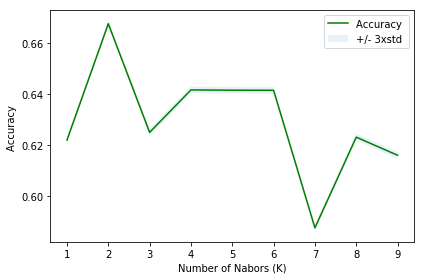

In [15]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7060224663433596 with k= 6
